In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
full_data = pd.read_csv('train.csv')
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#clean data

In [3]:
# 1. analysis columns and create clean data_frame
# 1. 1. clean 'Indexes', 'Name' and 'Ticket' - it is not important for analyses
# 1. 2 create df only with numbers data
clean_data = full_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [4]:
#1.2 transform to binary column 'Sex' and 'Embarked'
clean_data['sex'] = np.where(full_data['Sex'] == 'male', 0, 1)
clean_data['sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [5]:
#choose for fill Series - top value (or 50% - median sample)
clean_data['sex'].fillna(0)
full_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [6]:
full_data['Embarked'].fillna('S')
conditions = [full_data['Embarked'] == 'S', full_data['Embarked'] == 'C', full_data['Embarked'] == 'Q']
choices = [0, 1, 2]
clean_data['Embarked'] = np.select(conditions, choices, default= 0)

In [7]:
#analysys "Cabin"
full_data['Cabin'].isna().sum()

687

In [8]:
#we can see that Nan values are more than represent clean data, so we can't full column
#chack values in clean data for Nan values
clean_data.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
sex           0
Embarked      0
dtype: int64

In [9]:
#last columns for filling  is 'Age', so first we need to undersatant is normal distribution or not, because if it's True, we can use for filling data average/median value
clean_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

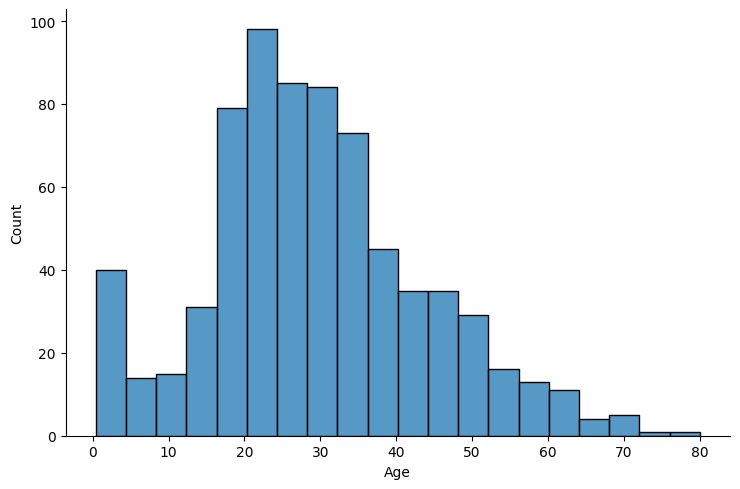

In [10]:
sns.displot(data = clean_data, x = 'Age', kind = 'hist', aspect=1.5)

In [11]:
sample = pd.Series(clean_data['Age'])
stat, p = stats.shapiro(sample)
if p > 0.05:
    print("Sample 'Age' has a normal distribution by Shapiro-Wilk Test, so we can use for filling column average/median value")
else:
    print("Sample 'Age' doesn't have a normal distribution by Shapiro-Wilk Test")

Sample 'Age' has a normal distribution by Shapiro-Wilk Test, so we can use for filling column average/median value


In [12]:
clean_data['Age'] = clean_data['Age'].fillna(full_data['Age'].mean())
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0
